It is worth while to perform some exploratory data analysis on the Google Speech Commands Dataset. I will be using the most up to data version of this dataset which can be found <href here

In [8]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
import tensorflow as tf

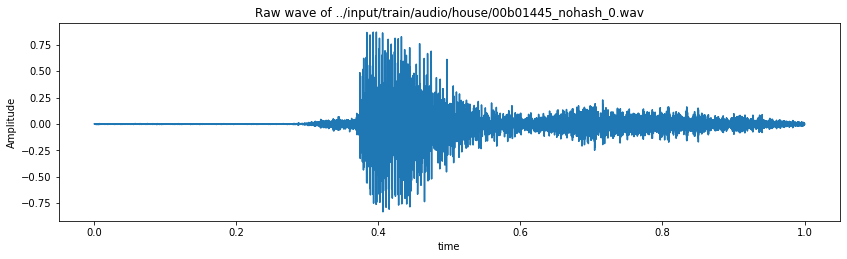

In [3]:
audio_path = 'C:/Users/cferr/Documents/4th Year/FYP Data/speech_commands_v0.02/'
samples, sample_rate = librosa.load(audio_path+'house/00b01445_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/house/00b01445_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [4]:
ipd.Audio(samples, rate=sample_rate)

In [5]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [6]:
labels=os.listdir(audio_path)

Let us take a look at what the commands are in the dataset

In [9]:
commands = np.array(tf.io.gfile.listdir(str(audio_path)))
commands = commands[commands != 'README.md']
print('Commands:', commands)

Commands: ['backward' 'bed' 'bird' 'cat' 'dog' 'down' 'eight' 'five' 'follow'
 'forward' 'four' 'go' 'happy' 'house' 'learn' 'left' 'marvin' 'nine' 'no'
 'off' 'on' 'one' 'right' 'seven' 'sheila' 'six' 'stop' 'three' 'tree'
 'two' 'up' 'visual' 'wow' 'yes' 'zero' '_background_noise_']


And now lets see the occurences of such commands

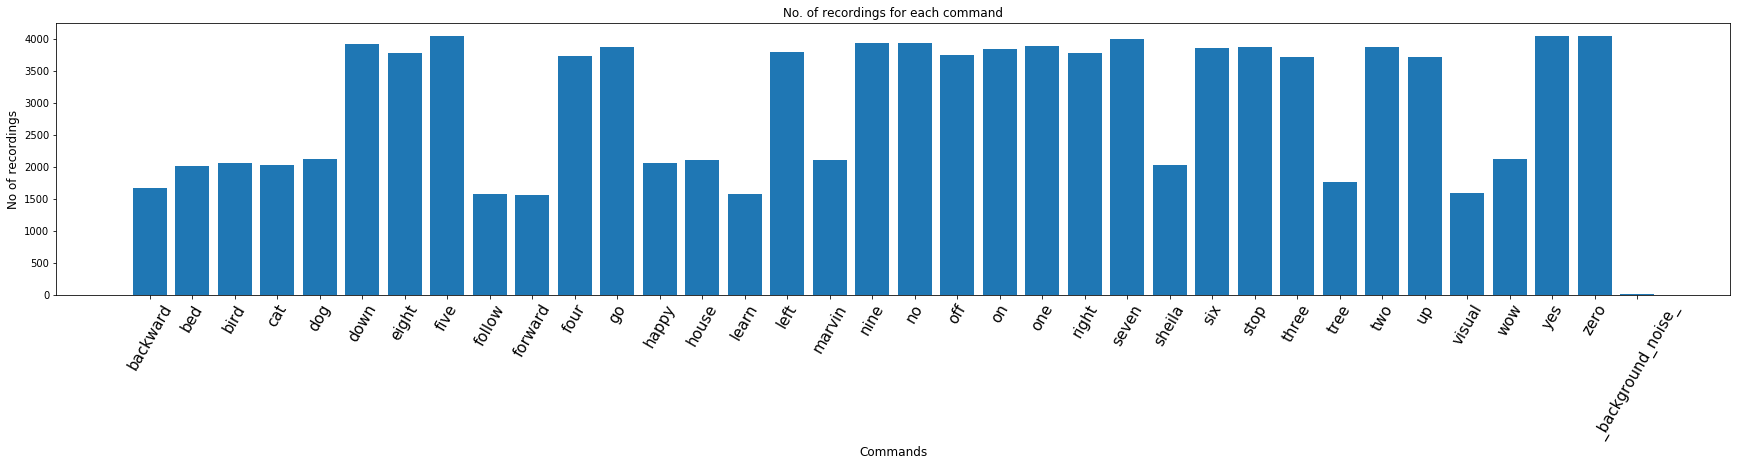

In [10]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

There is a lot of variability in the commands, some words have considerably less samples than others. The highest number of recordings for a singlwe command across the dataset is ~4000